In [28]:
import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [29]:
data = library.loadList('exoplanet.csv')

In [30]:
col = {'mass':2,'radius':3}

In [31]:
def getDensity(mass,radius):
    mass = float(mass)
    radius = float(radius)
    mass *= 1.898*(10**30)
    radius *= 6991100000
    density = mass / (4/3*(pi*radius**3))
    cleanDensity = round(density,2)
    return cleanDensity

In [32]:
massList = []
radiusList = []
densityList = []
masterList = []
for n in range(len(data)):
    mass = data[n][col['mass']]
    radius = data[n][col['radius']]
    if mass != '' and radius != '':
        density = getDensity(mass,radius)
        densityList.append(density)
        masterList += [[float(mass), float(radius), density]]

print('MASS, RADIUS, DENSITY:')
print(masterList)

MASS, RADIUS, DENSITY:
[[0.0014, 0.054, 11.79], [0.25, 0.84, 0.56], [0.17, 0.82, 0.41], [0.022, 0.147, 9.18], [0.6, 1.24, 0.42], [1.24, 1.67, 0.35], [0.0195, 0.2525, 1.61], [0.05074, 0.219624, 6.35], [0.025952, 0.076549, 76.72], [0.088, 0.44, 1.37], [0.892, 1.284, 0.56], [0.161, 0.515, 1.56], [0.68, 1.72, 0.18], [0.00409, 0.10298, 4.97], [0.00472, 0.10298, 5.73], [0.46, 1.045, 0.53], [0.57, 1.39, 0.28], [7.341, 1.281, 4.63], [4.87, 1.12, 4.6], [0.22, 0.764, 0.65], [0.679, 1.399, 0.33], [0.59, 1.42, 0.27], [2.18, 1.466, 0.92], [0.378, 1.115, 0.36], [1.0, 1.09, 1.02], [0.034099, 0.319867, 1.38], [2.26, 1.3, 1.36], [4.59, 1.438, 2.05], [0.66, 1.4, 0.32], [0.27619, 0.2661, 19.44], [0.20856, 0.3062, 9.63], [0.5, 1.407, 0.24], [1.9, 1.3, 1.15], [0.582, 1.182, 0.47], [0.505, 0.96, 0.76], [1.183, 1.807, 0.27], [0.59, 1.164, 0.5], [4.01, 1.49, 1.61], [3.31, 1.465, 1.4], [1.077, 1.03, 1.31], [0.0264, 0.194, 4.79], [2.487, 1.144, 2.2], [0.028091, 0.202309, 4.5], [0.011954, 0.107534, 12.75], [1.16

In [33]:
df = pd.DataFrame(masterList,columns=['Mass','Radius','Density'])
df

,Mass,Radius,Density
0,0.0014,0.054,11.79
1,0.2500,0.840,0.56
2,0.1700,0.820,0.41
3,0.0220,0.147,9.18
4,0.6000,1.240,0.42
...,...,...,...
430,0.7500,1.260,0.50
431,0.2200,0.570,1.58
432,1.3720,1.972,0.24
433,4.0630,1.024,5.02


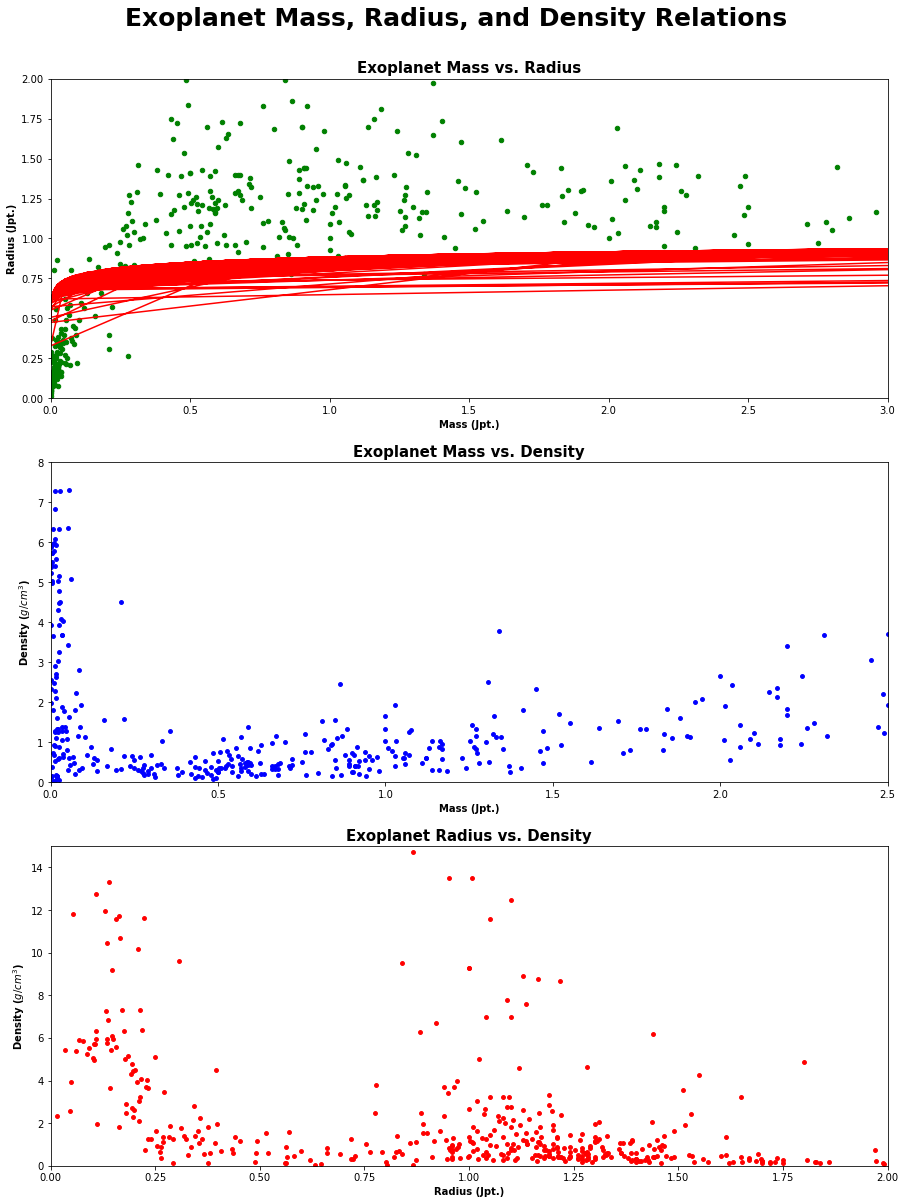

In [35]:
x = df.Mass
y = df.Radius
plt.figure(figsize=(15,20))

#Mass vs. Radius Plot
plt.subplot(311)
plt.scatter(x,y,s=20,c='g')
plt.title('Exoplanet Mass vs. Radius',fontweight='bold',fontsize=15)
plt.xlabel('Mass (Jpt.)',fontweight='bold')
plt.xlim(0,3)
plt.ylabel('Radius (Jpt.)',fontweight='bold')
plt.ylim(0,2)
a,b = np.polyfit(x,y,1)
fitEquasion = a * np.log(x) + b
plt.plot(x,fitEquasion,color='red')

#Mass vs. Density Plot
x = df.Mass
y = df.Density
plt.subplot(312)
plt.scatter(x,y,s=15,c='b')
plt.title('Exoplanet Mass vs. Density',fontweight='bold',fontsize=15)
plt.xlabel('Mass (Jpt.)',fontweight='bold')
plt.xlim(0,2.5)
plt.ylabel('Density ($g/cm^3$)',fontweight='bold')
plt.ylim(0,8)

#Radius vs. Density Plot
x = df.Radius
y = df.Density
plt.subplot(313)
plt.scatter(x,y,s=15,c='r')
plt.title('Exoplanet Radius vs. Density',fontweight='bold',fontsize=15)
plt.xlabel('Radius (Jpt.)',fontweight='bold')
plt.xlim(0,2)
plt.ylabel('Density ($g/cm^3$)',fontweight='bold')
plt.ylim(0,15)

plt.suptitle('Exoplanet Mass, Radius, and Density Relations',fontweight='bold',fontsize='25',y=0.93)

plt.show()